In [1]:
!pip install pykan

In [2]:
from kan import *
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [3]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

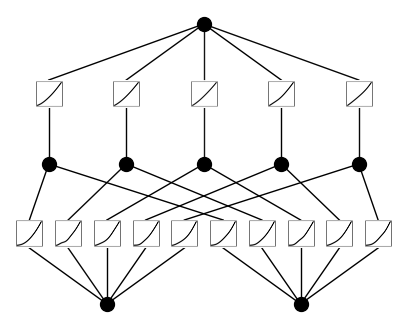

In [4]:
model(dataset['train_input']);
model.plot(beta=100)

In [5]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.56e-01 | test loss: 1.32e-01 | reg: 2.03e+01 : 100%|██| 20/20 [00:22<00:00,  1.11s/it]


In [6]:
model.plot()

In [7]:
model.prune()
model.plot(mask=True)

In [8]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [9]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 4.72e-03 | test loss: 4.76e-03 | reg: 3.05e+00 : 100%|██| 50/50 [00:15<00:00,  3.17it/s]


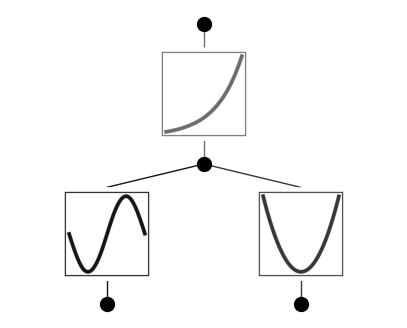

In [10]:
model.plot()

In [11]:
mode = "auto"

if mode == "manual":
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

In [12]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 1.44e-09 | test loss: 1.23e-09 | reg: 3.05e+00 : 100%|██| 50/50 [00:04<00:00, 11.11it/s]


In [13]:
model.symbolic_formula()[0][0]

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))